In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from numpy import save

In [2]:
image_size=64
dir = "/home/saksham/Desktop/cropped/"  
catagories = ["indians" , "foreigners"]
train_data = []
for categ in catagories:
 print(categ) 
 try:
     path = os.path.join(dir , categ)  
     class_name = catagories.index(categ)
     for img in os.listdir(path):
          img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array , (image_size , image_size))
          train_data.append([new_array , class_name])
 except Exception as e:
     pass
    

indians
foreigners


In [3]:
import random
random.shuffle(train_data)
# print(train_data[1][0])
x_train = np.zeros((len(train_data),64,64,3))
y_train = np.ndarray((len(train_data),) , int)
for i in range(len(train_data)):
    x_train[i]=train_data[i][0]
    y_train[i]=train_data[i][1]


In [4]:
x_train = x_train/255
save('x_train.npy' , x_train)

In [5]:
save('y_train.npy' , y_train)

In [6]:
x_train.shape

(2731, 64, 64, 3)

In [7]:
y_train.shape

(2731,)

In [8]:

dir_test = "/home/saksham/Desktop/cropped/test"
catagorie = ["indians" , "foreigners"]
test_data = []
for c in catagorie:
 try:
     path_test = os.path.join(dir_test , c)  
     class_name_test = catagorie.index(c)
     for img_test in os.listdir(path_test):
          img_array_test = cv2.imread(os.path.join(path_test, img_test) , cv2.IMREAD_COLOR)
          new_array_test = cv2.resize(img_array_test , (image_size , image_size))
          test_data.append([new_array_test , class_name_test])
 except Exception as e_test:
     pass

random.shuffle(test_data)
x_test = np.zeros((len(test_data),64,64,3))
y_test = np.ndarray((len(test_data),) , int)
for i in range(len(test_data)):
    x_test[i]=test_data[i][0]
    y_test[i]=test_data[i][1]
x_test = x_test/255


In [9]:
save('x_test.npy' , x_test)
save('y_test.npy' , y_test)

In [10]:
from tensorflow import keras

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16 , (3,3) ,activation='relu', input_shape=(64,64,3)) ,
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D((2,2)),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Conv2D(32,(3,3) ,activation='relu' ),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D((2,2)),
                             tf.keras.layers.Dropout(0.25),

                             tf.keras.layers.Conv2D(64 , (3,3) , activation='relu'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128 , activation='relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1 , activation='sigmoid')])

In [12]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [13]:
x_train.shape

(2731, 64, 64, 3)

In [14]:
x_test.shape

(462, 64, 64, 3)

In [15]:
model.fit(x_train , y_train , epochs=30)

Epoch 1/30
86/86 [==============================] - 9s 91ms/step - loss: 0.7275 - accuracy: 0.6825
Epoch 2/30
86/86 [==============================] - 9s 106ms/step - loss: 0.4563 - accuracy: 0.7958
Epoch 3/30
86/86 [==============================] - 10s 117ms/step - loss: 0.4492 - accuracy: 0.7952
Epoch 4/30
86/86 [==============================] - 10s 122ms/step - loss: 0.3754 - accuracy: 0.8333
Epoch 5/30
86/86 [==============================] - 8s 93ms/step - loss: 0.3377 - accuracy: 0.8425
Epoch 6/30
86/86 [==============================] - 11s 132ms/step - loss: 0.3091 - accuracy: 0.8685
Epoch 7/30
86/86 [==============================] - 10s 118ms/step - loss: 0.2821 - accuracy: 0.8868
Epoch 8/30
86/86 [==============================] - 11s 133ms/step - loss: 0.2552 - accuracy: 0.9024
Epoch 9/30
86/86 [==============================] - 11s 130ms/step - loss: 0.2377 - accuracy: 0.9016
Epoch 10/30
86/86 [==============================] - 11s 132ms/step - loss: 0.2287 - accuracy: 0

In [16]:
loss_test , acc_test = model.evaluate(x_test,y_test , verbose=2)

15/15 - 0s - loss: 0.7055 - accuracy: 0.8160


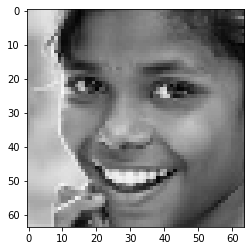

In [17]:
plt.imshow(x_train[1500])

In [18]:
predictions=model.predict(x_train)

In [19]:
predictions[0]

array([0.0046854], dtype=float32)